# Car motion example

The next few exercises in this workbook will give us a chance to practice what we've learned so far through engineering applications.

## Newton's laws of motion

Starting from rest, a car (mass = $900$ kg) accelerates under the influence of a force of $2000$ N until it reaches $13.89$ m/s ($50$ km/h). 
What is the distance traveled?
How long does it take to travel this distance?

Recall that Newton's second law of motion says:

$$ F = m \dfrac{dv}{dt} \tag{1} $$

This equation determines the velocity of the car as a function of time. 
To obtain the position of the car, we use the following kinematic relation:

$$ v = \dfrac{dx}{dt} \tag{2} $$

Although this problem can be solved analytically, in this exercise we would like to come up with a numerical solution using Python. 
We first need to discretize the equations, i.e., evaluate the position and velocity at equally spaced discrete points in time, since Python
doesn’t know how to interpret continuous functions. 
The solution for $v(t)$ and $x(t)$ will then be represented by vectors containing the values of the velocity and the position of the car
respectively at these discrete points in time separated by $\Delta t$.

The time derivative for the velocity in (1) can be approximated by:

$$ \dfrac{dv}{dt} \approx \dfrac{v(t + \Delta t) - v(t)}{\Delta t} $$

Equation (1) then becomes:

$$ \frac{F}{m} = \dfrac{v(t + \Delta t) - v(t)}{\Delta t} \quad \Leftrightarrow \quad v(t + \Delta t) = v(t) + \Delta t \frac{F}{m} $$

or, if we solve for the velocity at step $n+1$:

$$ v(n+1) = v(n) + \Delta t \dfrac{F}{m} $$

where the unknown is $v(n + 1)$.

Similarly, equation (2) becomes:

$$ \dfrac{x(t + \Delta t) - x(t)}{\Delta t} = v(t) \quad \Leftrightarrow \quad x(t + \Delta t) = x(t) + \Delta t v(t) $$

and the position at step $n + 1$ will be given by:

$$ x(n+1) = x(n) + \Delta t v(n) $$

Solve the above equations for position and velocity and plot the position as a function of time. 
Take $\Delta t = 0.1$ s.
Display the distance traveled and the time it takes to reach $50$ km/h.

We traveled 43.4 m and it took 6.3 s!


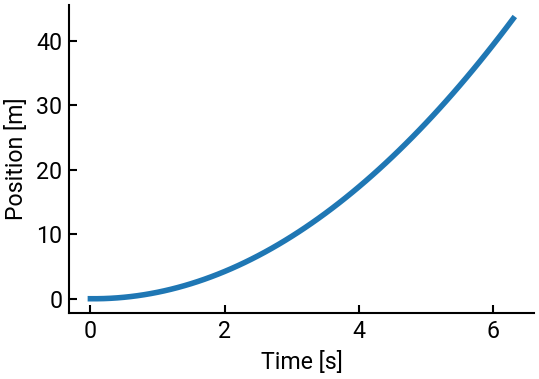

In [3]:
import numpy as np
import matplotlib.pyplot as plt

F = 2000     # force in Newtons
m = 900      # mass in kilograms
dt = 0.1     # time step in seconds
vf = 13.89   # final velocity

t = [0]
v = [0]
x = [0]

while v[-1] < vf:
    t.append(t[-1] + dt)
    v.append(v[-1] + F/m * dt)
    x.append(x[-1] + v[-2] * dt)   # note the indexing!

print(f"We traveled {x[-1]:.1f} m and it took {t[-1]:.1f} s!")
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set(xlabel="Time [s]", ylabel="Position [m]")
plt.show()